In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import paper_classes_2 as pc
import Post_processing as pp
import itertools

# First let's create the Swiss community with 100 houses from the CREM dataset

if it is the first time you run this script set first_time to True (to select randomly the demand profiles and the PV sizes), otherwise set it to False

In [2]:
first_time=True
community_size=100
timestep=1 # in hours

In [199]:
def plot_dispatch(pv, demand, E, week=30):
    """ Visualize dispatch algorithm for a specific week
    Parameters:
        demand (pd.Series): demand production
        pv (pd.Series): pv production
        E (dict):  Energy flows. Dictionary of pd.Series: res_pv, grid2load, store2inv, LevelOfCharge
    """

    sliced_index = (pv.index.week==week)
    pv_sliced = pv[sliced_index]
    demand_sliced = demand[sliced_index]
    self_consumption = E['inv2load'][sliced_index]
    
    direct_self_consumption = np.minimum(pv_sliced,demand_sliced)# E['inv2load'][sliced_index]
    indirect_self_consumption = self_consumption-direct_self_consumption
    res_pv_sliced = E['res_pv'][sliced_index]
    grid2load_sliced = E['grid2load'][sliced_index]
    store2inv_sliced = E['store2inv'][sliced_index]
    LevelOfCharge = E['LevelOfCharge'][sliced_index]
    inv2grid = E['inv2grid'][sliced_index]
    grid2load = E['grid2load'][sliced_index]
    aux=np.maximum(0,self_consumption)

    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(17, 4*3), frameon=False,
                             gridspec_kw={'height_ratios': [3, 1, 1], 'hspace': 0.04})

    #fig, ax = plt.subplots(figsize=(17, 4))
    axes[0].plot(demand_sliced.index, demand_sliced, color='black', lw=2,label='demand')
    axes[0].plot(pv_sliced.index, pv_sliced, color='black',ls='--', lw=2,label='PV')
    axes[0].fill_between(direct_self_consumption.index, 0, direct_self_consumption, color='orange', alpha=.8, label='DSC')
    axes[0].fill_between(pv_sliced.index, self_consumption, pv_sliced , where=pv_sliced<demand_sliced,color='blue', hatch='//',
                         alpha=.3,label='ISC')
    axes[0].fill_between(pv_sliced.index, direct_self_consumption, pv_sliced ,where=pv_sliced>demand_sliced, color='gold', alpha=.3,label='Excess PV')

    axes[0].fill_between(grid2load_sliced.index,self_consumption,demand_sliced,color='red',alpha=.2, label='grid2load')
        

    #axes[0].plot(grid2load_sliced.index, grid2load_sliced, color='red', ls=":", lw=1)
    axes[0].set_ylim([0, axes[0].get_ylim()[1] ])
    axes[0].set_ylabel('Power (kW)')

    axes[1].fill_between(LevelOfCharge.index, 0, LevelOfCharge, color='grey', alpha=.2, label='SOC')
    axes[1].set_ylabel('State of Charge (kWh)')

    axes[2].fill_between(inv2grid.index, 0, inv2grid, color='green', alpha=.2,label='injected2grid')
    axes[2].fill_between(inv2grid.index, 0, -grid2load, color='red', alpha=.2,label='grid drawn')
    axes[2].set_ylabel('In/out from grid (kW)')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    return



In [127]:

def plot_dispatch_comm(pv, demand, E, week=30,flag=False):
    """ Visualize dispatch algorithm for a specific week
    Parameters:
        demand (pd.Series): demand production
        pv (pd.Series): pv production
        E (dict):  Energy flows. Dictionary of pd.Series: res_pv, grid2load, store2inv, LevelOfCharge
    """

    sliced_index = (pv.index.week==week)
    pv_sliced = pv[sliced_index]
    demand_sliced = demand[sliced_index]
    self_consumption = E['inv2load'][sliced_index]
    
    direct_self_consumption = np.minimum(pv_sliced,demand_sliced)# E['inv2load'][sliced_index]
    indirect_self_consumption = self_consumption-direct_self_consumption
    res_pv_sliced = E['res_pv'][sliced_index]
    grid2load_sliced = E['grid2load'][sliced_index]
    store2inv_sliced = E['store2inv'][sliced_index]
    LevelOfCharge = E['LevelOfCharge'][sliced_index]
    inv2grid = E['inv2grid'][sliced_index]
    grid2load = E['grid2load'][sliced_index]
    aux=np.maximum(0,self_consumption)

    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(17, 4*3), frameon=False,
                             gridspec_kw={'height_ratios': [3, 1, 1], 'hspace': 0.04})

    #fig, ax = plt.subplots(figsize=(17, 4))
    axes[0].plot(demand_sliced.index, demand_sliced, color='black', lw=2,label='demand')
        
    if flag:
        axes[0].plot(pv_sliced.index, pv_sliced, color='green', lw=2,label='pv')
        axes[0].plot(direct_self_consumption.index, direct_self_consumption, color='yellow', lw=2,label='DSC')
        axes[0].plot(indirect_self_consumption.index, indirect_self_consumption, color='orange', lw=2,label='ISC')
        axes[0].plot(grid2load_sliced.index, grid2load_sliced, color='red', lw=2,label='grid')

    else:
        axes[0].fill_between(direct_self_consumption.index, 0, direct_self_consumption, color='orange', alpha=.8, label='DSC')
        axes[0].fill_between(pv_sliced.index, self_consumption, pv_sliced ,where=pv_sliced<demand_sliced, color='blue', hatch='//',
                             alpha=.3,label='ISC')
        axes[0].fill_between(pv_sliced.index, direct_self_consumption, pv_sliced , color='gold', alpha=.3,label='Excess PV')

        axes[0].fill_between(grid2load_sliced.index,self_consumption,demand_sliced,color='red',alpha=.2, label='grid2load')
    axes[0].set_ylim([0, axes[0].get_ylim()[1] ])
    axes[0].set_ylabel('Power (kW)')

    axes[1].fill_between(LevelOfCharge.index, 0, LevelOfCharge, color='grey', alpha=.2, label='SOC')
    axes[1].set_ylabel('State of Charge (kWh)')

    axes[2].fill_between(inv2grid.index, 0, inv2grid, color='green', alpha=.2,label='injected2grid')
    axes[2].fill_between(inv2grid.index, 0, -grid2load, color='red', alpha=.2,label='grid drawn')
    axes[2].set_ylabel('In/out from grid (kW)')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    return

In [5]:

def print_analysis(pv, demand, param, E,save=True):
    """ Print statistics and information of the dispatched solution
    Arguments
        pv (pd.Series): PV timeseries
        demand (pd.Series): demand timeseries
        param (dict): dictionary of technical parameters
        E (dict): dictionary of energy flows as estimated by the algorithm
    Returns
        none
    """
    timestep = param['timestep']
    SelfConsumption = np.sum(E['inv2load']) * timestep
    TotalFromGrid = np.sum(E['grid2load']) * timestep
    TotalToGrid = np.sum(E['inv2grid']) * timestep
    TotalLoad = demand.sum() * timestep
    TotalPV = pv.sum() * timestep
    TotalBatteryGeneration = np.sum(E['store2inv']) * timestep
    TotalBatteryConsumption = np.sum(E['pv2store']) * timestep
    
    if 'inverter_losses' in E.keys():
        BatteryLosses=E['battery_losses'].sum()
        InverterLosses=E['inverter_losses'].sum()
    else:
        BatteryLosses = TotalBatteryConsumption - TotalBatteryGeneration
        InverterLosses = (TotalPV - BatteryLosses) * (1 - param['InverterEfficiency'])
    SelfConsumptionRate = SelfConsumption / TotalPV * 100             # in %
    SelfSufficiencyRate = SelfConsumption / TotalLoad * 100
    AverageDepth = TotalBatteryGeneration / (365 * param['BatteryCapacity'])
    Nfullcycles = 365 * AverageDepth
    residue = TotalPV + TotalFromGrid - TotalToGrid - BatteryLosses - InverterLosses - TotalLoad


    print ('Total yearly consumption: {:1g} kWh'.format(TotalLoad))
    print ('Total PV production: {:1g} kWh'.format(TotalPV))
    print ('Self Consumption: {:1g} kWh'.format(SelfConsumption))
    print ('Total fed to the grid: {:1g} kWh'.format(TotalToGrid))
    print ('Total bought from the grid: {:1g} kWh'.format(TotalFromGrid))
    print ('Self consumption rate (SCR): {:.3g}%'.format(SelfConsumptionRate))
    print ('Self sufficiency rate (SSR): {:.3g}%'.format(SelfSufficiencyRate))
    print ('Amount of energy provided by the battery: {:1g} kWh'.format(TotalBatteryGeneration))
    print ('Average Charging/Discharging depth: {:1g}'.format(AverageDepth))
    print ('Number of equivalent full cycles per year: {:1g} '.format(Nfullcycles))
    print ('Total battery losses: {:1g} kWh'.format(BatteryLosses))
    print ('Total inverter losses: {:1g} kWh'.format(InverterLosses))
    print ('Residue (check): {:1g} kWh'.format(residue))

In [6]:

def dispatch_max_sc(pv, demand, param, return_series=False):
    """ Self consumption maximization pv + battery dispatch algorithm.
    The dispatch of the storage capacity is performed in such a way to maximize self-consumption:
    the battery is charged when the PV power is higher than the load and as long as it is not fully charged.
    It is discharged as soon as the PV power is lower than the load and as long as it is not fully discharged.
    Arguments:
        pv (pd.Series): Vector of PV generation, in kW DC (i.e. before the inverter)
        demand (pd.Series): Vector of household consumption, kW
        param (dict): Dictionary with the simulation parameters:
                timestep (float): Simulation time step (in hours)
                BatteryCapacity: Available battery capacity (i.e. only the the available DOD), kWh
                BatteryEfficiency: Battery round-trip efficiency, -
                InverterEfficiency: Inverter efficiency, -
                MaxPower: Maximum battery charging or discharging powers (assumed to be equal), kW
        return_series(bool): if True then the return will be a dictionary of series. Otherwise it will be a dictionary of ndarrays.
                        It is reccommended to return ndarrays if speed is an issue (e.g. for batch runs).
    Returns:
        dict: Dictionary of Time series
    """

    bat_size_e_adj = param['BatteryCapacity']
    bat_size_p_adj = param['MaxPower']
    n_bat = param['BatteryEfficiency']
    n_inv = param['InverterEfficiency']
    timestep = param['timestep']
    # We work with np.ndarrays as they are much faster than pd.Series
    Nsteps = len(pv)
    LevelOfCharge = np.zeros(Nsteps)
    pv2store = np.zeros(Nsteps)
    #inv2grid = np.zeros(Nsteps)
    store2inv = np.zeros(Nsteps)
    grid2store = np.zeros(Nsteps) # TODO Always zero for now.

    #Load served by PV
    pv2inv = np.minimum(pv, demand / n_inv)  # DC direct self-consumption

    #Residual load
    res_load = (demand - pv2inv * n_inv)  # AC
    inv2load = pv2inv * n_inv  # AC

    #Excess PV
    res_pv = np.maximum(pv - demand/n_inv, 0)  # DC

    #PV to storage after eff losses
    pv2inv = pv2inv.values

    #first timestep = 0
    LevelOfCharge[0] = 0  # bat_size_e_adj / 2  # DC

    for i in range(1,Nsteps):
        #PV to storage
        if LevelOfCharge[i-1] >= bat_size_e_adj:  # if battery is full
                pv2store[i] = 0
        else: #if battery is not full
            if LevelOfCharge[i-1] + res_pv[i] * n_bat * timestep > bat_size_e_adj:  # if battery will be full after putting excess
                pv2store[i] = min((bat_size_e_adj - LevelOfCharge[i-1]) / timestep, bat_size_p_adj)
            else:
                pv2store[i] = min(res_pv[i], bat_size_p_adj)

        #Storage to load
        if pv2store[i]==0:
            store2inv[i] = min(bat_size_p_adj,  # DC
                           res_load[i] / n_inv,
                           LevelOfCharge[i-1] / timestep)

        #SOC
        LevelOfCharge[i] = min(LevelOfCharge[i-1] - (store2inv[i] - pv2store[i] - grid2store[i]) * timestep,  # DC
                               bat_size_e_adj)

    pv2inv = pv2inv + res_pv - pv2store
    inv2load = inv2load + store2inv * n_inv  # AC
    inv2grid = (res_pv - pv2store) * n_inv  # AC
    grid2load = demand - inv2load  # AC

    #MaxDischarge = np.minimum(LevelOfCharge[i-1]*BatteryEfficiency/timestep,MaxPower)


    #Potential Grid to storage  # TODO: not an option for now in this strategy
    # GridPurchase = False

    out = {'pv2inv': pv2inv,
            'res_pv': res_pv,
            'pv2store': pv2store,
            'inv2load': inv2load,
            'grid2load': grid2load,
            'store2inv': store2inv,
            'LevelOfCharge': LevelOfCharge,
            'inv2grid': inv2grid
            # 'grid2store': grid2store
            }
    if not return_series:
        out_pd = {}
        for k, v in out.items():  # Create dictionary of pandas series with same index as the input pv
            out_pd[k] = pd.Series(v, index=pv.index)
        out = out_pd
    return out

In [7]:
def flag_selection(df,list_product,community_size):
    list_names=['sub_'+str(i[0])+'_'+str(i[1]) for i in list_product]
    for i in list_names:
        df[i]=False
    dict_pv_df={}
    dict_batt_df={}
    j=0
    l=0
    for i in list_pv_penetration: 
        #print('-----')
        dict_pv_df[j]=np.random.choice(df.index,int(len(df)*(i/100)), replace=False)
        for k in list_batt_penetration:
            #print(int(len(dict_pv_df[j])*(k/100)))
            dict_batt_df[l]=np.random.choice(dict_pv_df[j],int(len(dict_pv_df[j])*(k/100)), replace=False)
            df.iloc[dict_batt_df[l],l+2]=True
            l+=1
        j+=1
    return df

In [8]:
if first_time:
    df_CH=pd.read_csv('../BASOPRA_IRES/Input/df_CH_Marzia2.csv', encoding='utf8', sep=',',usecols=[*range(0, 669)],
                                  engine='python',date_parser=lambda col: pd.to_datetime(col, utc=True),infer_datetime_format=True,index_col=0)
    df_CH.index=df_CH.index.tz_convert('Europe/Brussels')
    if timestep==1:
        df_CH=df_CH.resample('1H').sum()
    max_PV=10
    path='Switzerland/Input/'
    df_pv_ch=pd.read_excel(path+'PV_beneficiaires_Swiss.xlsx')
    df_nat=df_pv_ch[(df_pv_ch['Anlage_Projekt-Bezeichnung']=='natürliche Person')]
    df_nat_pv=df_nat[(df_nat['Anlage_Energieträger']=='Photovoltaik')]
    df_nat_pv_15=df_nat_pv[df_nat_pv['Leistung [kW]']<max_PV]['Leistung [kW]'].reset_index(drop=True)

df_CH contains 667 demand profiles for 2017 (CREM is for 2015, but this dataset was actualize to match 2017). The last column is E_PV which includes the PV generation for 1 kW system in Geneva for 2017. The community will be done selecting 100 out of the 667 profiles. We select only those profiles with a consumption below 7500 kWh per year (647)

The PV distribution contains more than 20000 points, we randomly select 100 (lower than 10 kW).

In [9]:
if first_time:
    df=pd.DataFrame(df_CH.loc[:,(df_CH.sum()<7500)&(df_CH.columns!='E_PV')].sample(n=community_size,axis=1).columns)
    selection=pd.concat([df_nat_pv_15.round(1).sample(n=community_size).reset_index(drop=True),df],axis=1)
    selection.columns=['PV_size','name']
    list_pv_penetration=[100,75,50,25]# %
    list_batt_penetration=[100,75,50,25]# %
    list_product=list(itertools.product(list_pv_penetration,list_batt_penetration))
    flag_selection(selection,list_product,community_size)
    print(selection.sum())
    selection.to_csv('Switzerland/Input/selection.csv',index=False)
    first_time=False

PV_size        520.3
name             inf
sub_100_100    100.0
sub_100_75      75.0
sub_100_50      50.0
sub_100_25      25.0
sub_75_100      75.0
sub_75_75       56.0
sub_75_50       37.0
sub_75_25       18.0
sub_50_100      50.0
sub_50_75       37.0
sub_50_50       25.0
sub_50_25       12.0
sub_25_100      25.0
sub_25_75       18.0
sub_25_50       12.0
sub_25_25        6.0
dtype: float64


In [10]:
if not first_time:
    selection=pd.read_csv('Switzerland/Input/selection.csv')
    #pd.read_csv('../BASOPRA_IRES/Input/df_CH_Marzia2.csv', encoding='utf8', sep=',',usecols=demand_profiles['0'],engine='python')

In [11]:
param_tech = {'BatteryCapacity': 10,
              'BatteryEfficiency': .91,
              'InverterEfficiency': .94,
              'timestep': timestep,
              'MaxPower': 4
             }

In [12]:
selection.head()

,PV_size,name,sub_100_100,sub_100_75,sub_100_50,sub_100_25,sub_75_100,sub_75_75,sub_75_50,sub_75_25,sub_50_100,sub_50_75,sub_50_50,sub_50_25,sub_25_100,sub_25_75,sub_25_50,sub_25_25
0,9.5,110145456531,True,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
1,4.9,1127348129731,True,True,False,False,True,False,True,False,True,True,True,True,False,False,False,False
2,5.7,110699030138,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
3,1.5,110141955910,True,True,False,False,True,False,True,True,True,False,True,False,False,False,False,False
4,9.9,110145256477,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,False


In [13]:
import pickle
def save_obj(obj, name ):
    with open('Switzerland/Output/'+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('Switzerland/Output/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Community as today (Current state in Community)

Select the PV and battery penetration. Here there is no battery export.

We use the model from Quoilin et al. [1] for PV and battery dispatch and adapt it for the community case.

[1] Quoilin, S. et al., 'Quantifying self-consumption linked to solar home battery systems: Statistical analysis and economic assessment', Applied Energy, Elsevier, 2016, 182, pp. 58-67 (https://github.com/energy-modelling-toolkit/prosumpy)

In [14]:
param_tech_no_batt = {'BatteryCapacity': 0,
              'BatteryEfficiency': .91,
              'InverterEfficiency': .94,
              'timestep': timestep,
              'MaxPower': 0
             }

In [202]:
pv_penetration=100
batt_penetration=75

We set the battery capacity to zero in some cases to get the direct SC only

We iterate through the community and get the dispatching

In [203]:
nested_out={}
j=0
k=0
PV_size_comm=0
for i in selection.index:
    print(i, end='')
    if selection.loc[i,'sub_'+str(pv_penetration)+'_100']:#all with PV
        PV_size_comm+=selection.PV_size[i]
        if selection.loc[i,'sub_'+str(pv_penetration)+'_'+str(batt_penetration)]: #if battery
            nested_out[i]=dispatch_max_sc(df_CH.E_PV*selection.PV_size[i],df_CH.loc[:,str(selection.name[i])],param_tech)
            j+=1
        else: #if only PV battery=0 kWh
            nested_out[i]=dispatch_max_sc(df_CH.E_PV*selection.PV_size[i],df_CH.loc[:,str(selection.name[i])],param_tech_no_batt)
            k+=1
    else: #No PV
        nested_out[i]=dispatch_max_sc(df_CH.E_PV*0,df_CH.loc[:,str(selection.name[i])],param_tech_no_batt)
    

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899

In [204]:
#get all the data in a single dict
pv2inv=pd.DataFrame()
res_pv=pd.DataFrame()
pv2store=pd.DataFrame()
inv2load=pd.DataFrame()
grid2load=pd.DataFrame()
store2inv=pd.DataFrame()
LevelOfCharge=pd.DataFrame()
inv2grid=pd.DataFrame()
for i in nested_out.keys():
    pv2inv['pv2inv'+str(i)]=nested_out[i]['pv2inv']
    pv2store['pv2store'+str(i)]=nested_out[i]['pv2store']
    inv2load['inv2load'+str(i)]=nested_out[i]['inv2load']
    store2inv['store2inv'+str(i)]=nested_out[i]['store2inv']
    LevelOfCharge['LevelOfCharge'+str(i)]=nested_out[i]['LevelOfCharge']
    res_pv['res_pv'+str(i)]=nested_out[i]['res_pv']#not important, recalculated later
    inv2grid['inv2grid'+str(i)]=nested_out[i]['inv2grid']#not important, recalculated later
    grid2load['grid2load'+str(i)]=nested_out[i]['grid2load']#not important, recalculated later
nested_dict={'pv2inv':pv2inv.sum(axis=1),'res_pv':res_pv.sum(axis=1),'pv2store':pv2store.sum(axis=1),'inv2load':inv2load.sum(axis=1),
             'grid2load':grid2load.sum(axis=1),'store2inv':store2inv.sum(axis=1),'LevelOfCharge':LevelOfCharge.sum(axis=1),'inv2grid':inv2grid.sum(axis=1)}

Now calculate how the excess of PV will be absorbed in the remaining load of the community (all households without batteries)

In [205]:
out_comm_res=dispatch_max_sc(nested_dict['inv2grid'],nested_dict['grid2load'],param_tech_no_batt)

Finaly create the dictionary combining the results from the households with PV, PV and battery and without.

In [206]:
out_comm_final={}
out_comm_final['pv2inv']=nested_dict['pv2inv']
out_comm_final['pv2store']=nested_dict['pv2store']
out_comm_final['inv2load']=(nested_dict['inv2load']+out_comm_res['inv2load'])
out_comm_final['store2inv']=nested_dict['store2inv']
out_comm_final['LevelOfCharge']=nested_dict['LevelOfCharge']
out_comm_final['res_pv']=out_comm_res['res_pv']
out_comm_final['inv2grid']=out_comm_res['inv2grid']
out_comm_final['grid2load']=out_comm_res['grid2load']
out_comm_final['battery_losses']=nested_dict['pv2store']-nested_dict['store2inv']
out_comm_final['inverter_losses']=(nested_dict['pv2inv']+nested_dict['pv2store']-out_comm_final['battery_losses']+out_comm_res['pv2inv']+out_comm_res['pv2store'])*(1-param_tech['InverterEfficiency'])
out_comm_final['PV_size_comm']=PV_size_comm
out_comm_final['df']=df_CH
out_comm_final['param_tech']=param_tech
out_comm_final['nested_dict']=nested_dict
out_comm_final['pv_penetration']=pv_penetration
out_comm_final['batt_penetration']=batt_penetration
out_comm_final['selection']=selection


Run the analysis of the community with the PV size equals to the sum of all PV sizes and with the aggregated demand

In [207]:
print_analysis(df_CH.E_PV*PV_size_comm, df_CH.loc[:,df.iloc[:,0]].sum(axis=1),param_tech_no_batt,out_comm_final)

Total yearly consumption: 292910 kWh
Total PV production: 728624 kWh
Self Consumption: 218005 kWh
Total fed to the grid: 438132 kWh
Total bought from the grid: 74904.1 kWh
Self consumption rate (SCR): 29.9%
Self sufficiency rate (SSR): 74.4%
Amount of energy provided by the battery: 104316 kWh
Average Charging/Discharging depth: inf
Number of equivalent full cycles per year: inf 
Total battery losses: 333.388 kWh
Total inverter losses: 72152.9 kWh
Residue (check): 5.82077e-11 kWh


/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


In [21]:
(df_CH.loc[:,df.iloc[:,0]].sum(axis=1)-(out_comm_final['grid2load']+out_comm_final['inv2load'])).sum()

1.0746958878371515e-12

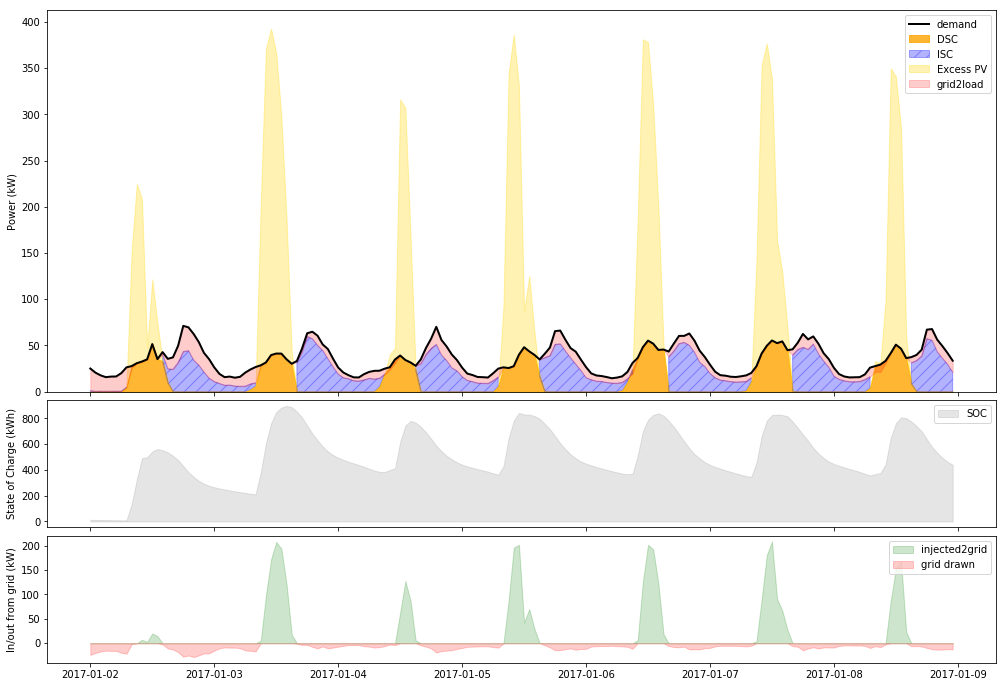

In [28]:
plot_dispatch_comm(df_CH.E_PV*PV_size_comm, df_CH.loc[:,df.iloc[:,0]].sum(axis=1),out_comm_final, week=1,flag=0)

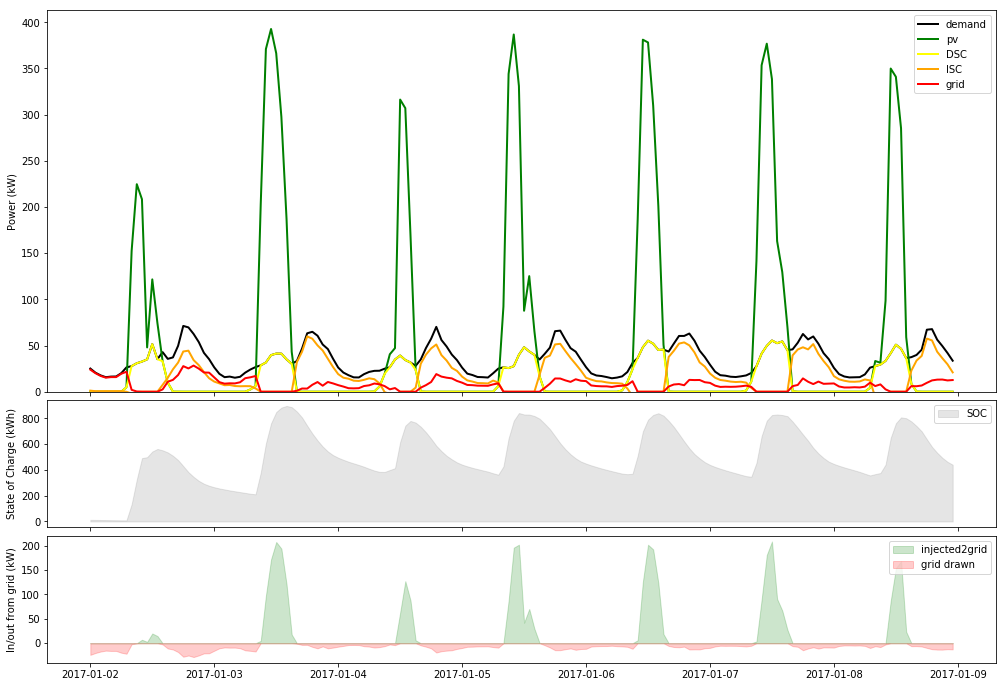

In [29]:
plot_dispatch_comm(df_CH.E_PV*PV_size_comm, df_CH.loc[:,df.iloc[:,0]].sum(axis=1),out_comm_final, week=1,flag=1)

In [123]:
selection.iloc[1]

PV_size                  4.9
name           1127348129731
sub_100_100             True
sub_100_75              True
sub_100_50             False
sub_100_25             False
sub_75_100              True
sub_75_75              False
sub_75_50               True
sub_75_25              False
sub_50_100              True
sub_50_75               True
sub_50_50               True
sub_50_25               True
sub_25_100             False
sub_25_75              False
sub_25_50              False
sub_25_25              False
Name: 1, dtype: object

In [128]:
out_aux=dispatch_max_sc(df_CH.E_PV*selection.PV_size[1],df_CH.loc[:,str(selection.name[1])],param_tech)

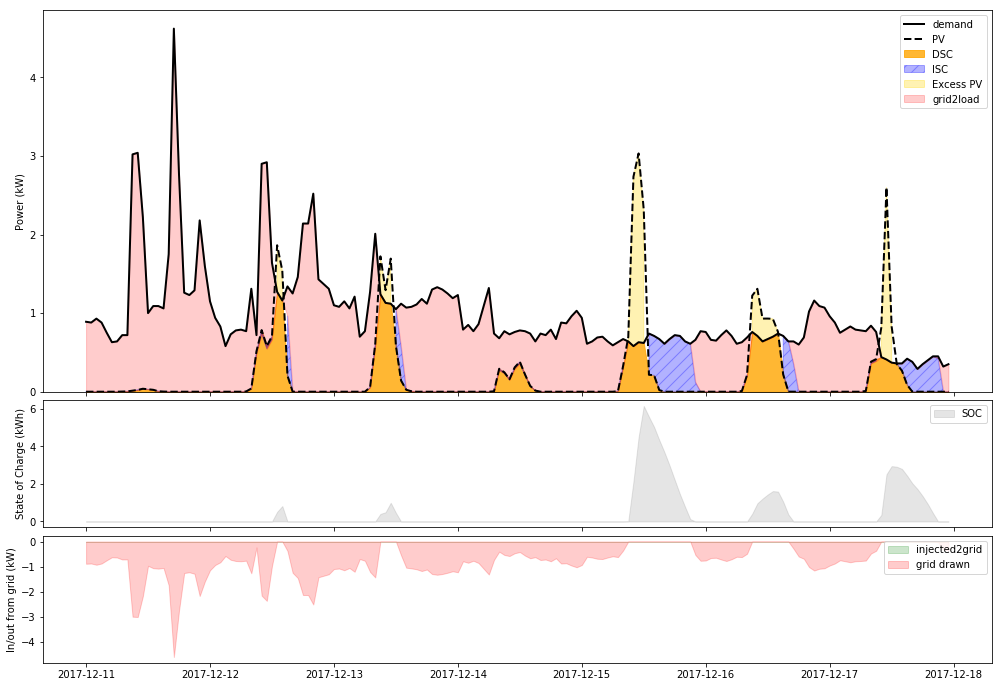

In [201]:
plot_dispatch(df_CH.E_PV*selection.PV_size[1],df_CH.loc[:,str(selection.name[1])],out_aux,week=50)